## Load libraries

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from pathlib import Path 

from PyGEL3D import gel
from PyGEL3D import js

import plotly.graph_objects as go

import numpy as np
import pandas as pd

from gtda.mapper import *
from gtda.mapper.visualization import *
from gtda.plotting import *

from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore") 

## Load image

In [ ]:
DATA = Path('data/')
!ls {DATA}

alien.obj


## Plot image

In [ ]:
m = gel.obj_load(f"{DATA}/alien.obj")

In [ ]:
# plot image and color by height
pos = m.positions()
js.display(m, data=pos[:,2], wireframe=True)

FigureWidget({
    'data': [{'color': '#dddddd',
              'flatshading': False,
              'i': array(…

## Create point cloud

In [ ]:
x, y, z = pos[:, 0], pos[:, 1], pos[:, 2]
X = np.vstack([x, y, z]).T
X.shape

(14098, 3)

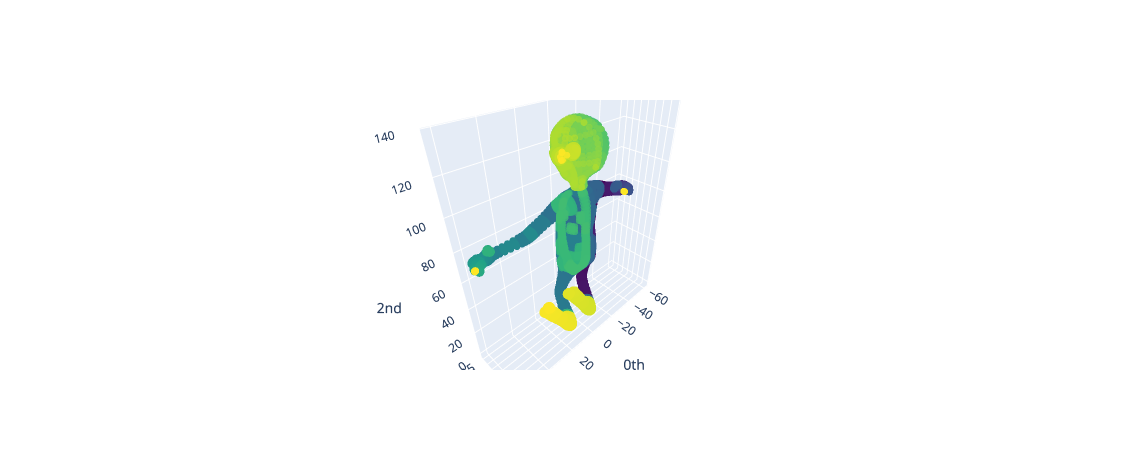

In [ ]:
plot_point_cloud(X)

In [ ]:
pd.DataFrame(X, columns=['x', 'y', 'z']).to_csv(f'{DATA}/alien.csv')

## Rescale to unit height

In [ ]:
X_scaled = MinMaxScaler().fit_transform(X)

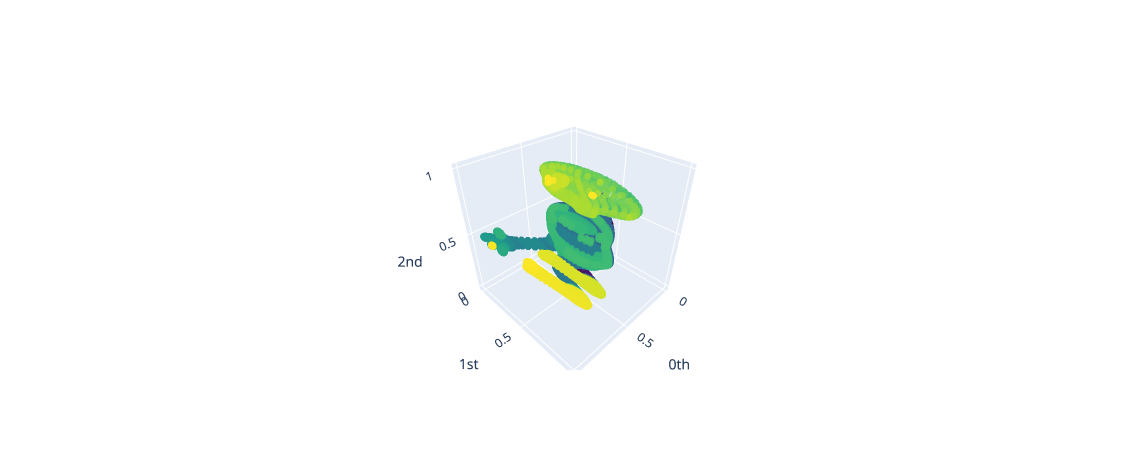

In [ ]:
plot_point_cloud(X_scaled)

## Mapper

In [ ]:
# define filter function 
filter_func = Projection(columns=[0,2])
# define cover
cover = CubicalCover(n_intervals=10, overlap_frac=0.4)
# choose clustering algorithm
clusterer = FirstSimpleGap(linkage='single', relative_gap_size=0.8)

In [ ]:
n_jobs = 1

pipe = make_mapper_pipeline(filter_func=filter_func,
                            cover=cover,
                            clusterer=clusterer,
                            verbose=False,
                            n_jobs=n_jobs)

In [ ]:
graph = pipe.fit_transform(X_scaled)

In [ ]:
# OK params: overlap_frac = 0.4 and relative_gap = 0.8
plot_interactive_mapper_graph(pipe, X_scaled)